**Projet Principal** : Airbnb - Détection et Analyse de Commentaires

**Jour 1** : Détection de langue et séparation des données:


**groupe 13**: Ben Mokhtar Khadidja /
           Sylla NOUHO /
           Kevine FIANGUEU SIABO


**Installation** et **importatio**n des differents packages necéssaire pour la proojet :

In [1]:
!pip install httpx==0.24.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: httpcore
    Found existing installation: httpcore 1.0.7
    Uninstalling httpcore-1.0.7:
      Successfully uninstalled httpcore-1.0.7
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


In [2]:
#Étape 1 : Chargement des données et des instalatio des packages :
import pandas as pd
!pip install langdetect
!pip install googletrans==4.0.0-rc1
from googletrans import Translator
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=8caec4e4bb9f8712b6b72bc7fcf8fd4c5c89d28c954e427d2a6a6af9ba8b6bb1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 846.4 kB/s eta 

nous avons décider de prendre un echantillon de 80 lignes de 20 dans chaque villes

In [3]:
# Fixing random seed for langdetect consistency
DetectorFactory.seed = 0

# Dictionary of input files and their corresponding city names
file_city_mapping = {
    'reviews.csv': 'Albany',
    'reviewsAmestrdam.csv': 'Amsterdam',
    'reviewsAntwerp.csv': 'Antwerp',
    'reviewsAsheville.csv': 'Asheville'
}

# Load dataframes before sampling
reviews = pd.read_csv('reviews.csv') # Load reviews.csv into the 'reviews' DataFrame
reviewsAmestrdam = pd.read_csv('reviewsAmestrdam.csv')  # Load reviewsAmestrdam.csv
reviewsAntwerp = pd.read_csv('reviewsAntwerp.csv')  # Load reviewsAntwerp.csv
reviewsAsheville = pd.read_csv('reviewsAsheville.csv')  # Load reviewsAsheville.csv


Albany_sample = reviews.sample(n=20, random_state=1)
Amsterdam_sample = reviewsAmestrdam.sample(n=20, random_state=1)
Antwerp_sample = reviewsAntwerp.sample(n=20, random_state=1)
Asheville_sample = reviewsAsheville.sample(n=20, random_state=1)

# Ajouter une colonne 'Country'
Albany_sample['city'] = 'Albany'
Amsterdam_sample['city'] = 'Amsterdam'
Antwerp_sample['city'] = 'Antwerp'
Asheville_sample['city'] = 'Asheville'


full_data = pd.concat([Albany_sample, Amsterdam_sample, Antwerp_sample, Asheville_sample], ignore_index=True)

full_data.head()



,listing_id,id,date,reviewer_id,reviewer_name,comments,city
0,32993402,591977294646018902,2022-03-27,288124504,Vava,This is an amazing place to stay neat clean an...,Albany
1,45024912,740336846,2021-03-19,59918258,Zachary,Quiet and cozy. Perfect for my stay.,Albany
2,3820211,224244642,2018-01-02,69097481,Tara,We loved that this apartment is in an old prec...,Albany
3,28400263,737666100052507783,2022-10-14,26010,Margaret,Ed's place is a great place to stay. Plenty ...,Albany
4,48124042,688350144936875595,2022-08-07,11077131,Sophie,"Joli appartement, très propre, grandes chambre...",Albany


In [4]:
full_data.shape

(80, 7)

<h1> Exploration des données

In [5]:
# Step 2: Explore the structure of the data
print("Columns in the dataset:", full_data.columns)
print("Sample data:")
print(full_data.head())

Columns in the dataset: Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'city'],
      dtype='object')
Sample data:
   listing_id                  id        date  reviewer_id reviewer_name  \
0    32993402  591977294646018902  2022-03-27    288124504          Vava   
1    45024912           740336846  2021-03-19     59918258       Zachary   
2     3820211           224244642  2018-01-02     69097481          Tara   
3    28400263  737666100052507783  2022-10-14        26010      Margaret   
4    48124042  688350144936875595  2022-08-07     11077131        Sophie   

                                            comments    city  
0  This is an amazing place to stay neat clean an...  Albany  
1               Quiet and cozy. Perfect for my stay.  Albany  
2  We loved that this apartment is in an old prec...  Albany  
3  Ed's place is a great place to stay.   Plenty ...  Albany  
4  Joli appartement, très propre, grandes chambre...  Albany  


In [6]:
 # Exploration des données
def explore_data(full_data):
    """
    Affiche un résumé des informations sur le DataFrame, y compris :
    - Nombre de lignes et colonnes
    - Nombre de valeurs manquantes (NaN) par colonne
    - Pourcentage de valeurs manquantes par colonne

    Paramètres:
        full_data (pd.DataFrame): Le DataFrame à explorer

    Retourne:
        None
    """
    print("Résumé des données :")
    print(f"Nombre total de lignes : {full_data.shape[0]}")
    print(f"Nombre total de colonnes : {full_data.shape[1]}")
    print("\nAperçu des valeurs manquantes :")

    missing_values = full_data.isnull().sum()
    percent_missing = (missing_values / len(full_data)) * 100
    missing_info = pd.DataFrame({
        'Valeurs manquantes': missing_values,
        'Pourcentage de valeurs manquantes (%)': percent_missing
    })

    print(missing_info)
    print("\nTypes de données par colonne :")
    print(full_data.dtypes)
#identifier les doublons :

print(f"nombre de doublons est:{full_data.duplicated().sum()}")
# Appel de la fonction
explore_data(full_data)



nombre de doublons est:0
Résumé des données :
Nombre total de lignes : 80
Nombre total de colonnes : 7

Aperçu des valeurs manquantes :
               Valeurs manquantes  Pourcentage de valeurs manquantes (%)
listing_id                      0                                    0.0
id                              0                                    0.0
date                            0                                    0.0
reviewer_id                     0                                    0.0
reviewer_name                   0                                    0.0
comments                        0                                    0.0
city                            0                                    0.0

Types de données par colonne :
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
city             object
dtype: object


On constate : qu il n ya pas de doublons et pas de valeurs manquantes.

Nos variables sont de types chaines de caracteres et de types entiers

Dans notre analyse nous allons traiter les valeurs manquantes et supprimer les doublons .

<h1>Traitement des données:

In [7]:
# Step 3: Data Cleaning
# Drop duplicates
full_data = full_data.drop_duplicates()
full_data=full_data.dropna(subset=["comments"])

# Drop rows with missing 'commentaire'
if 'commentaire' in full_data.columns:
    # Remplacer toutes les variantes de 'na', 'nan', etc. par des valeurs nulles (NaN)
    full_data['comments'] = full_data['comments'].replace(
        to_replace=r'^\s*(na|nan|NaN|NA|Na|nA|nAn|NaN)\s*$',
        value=np.nan,
        regex=True
    )

    # Supprimer les lignes avec des valeurs nulles (NaN) dans la colonne 'commentaire'
    full_data.fillna("NaN",inplace=True)

    # Convert all text in 'commentaire' column to lowercase
    full_data['comments'] = full_data['comments'].str.lower()

    # Remove HTML tags
    full_data['comments'] = full_data['comments'].str.replace(r'<.*?>', '', regex=True)

    # Remove non-text characters (e.g., symbols, numbers)
    full_data['comments'] = full_data['comments'].str.replace(r'[^\w\s]', '', regex=True)



In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     80 non-null     int64 
 1   id             80 non-null     int64 
 2   date           80 non-null     object
 3   reviewer_id    80 non-null     int64 
 4   reviewer_name  80 non-null     object
 5   comments       80 non-null     object
 6   city           80 non-null     object
dtypes: int64(3), object(4)
memory usage: 4.5+ KB


<h1>Detection de langues

Nous avons choisi le model detect langue pour la detection de langues parce que nous le trouvons beaucoups plus rapide et facile a utiliser

In [9]:

# Step 5: Language Detection on the Sample
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Apply language detection to the 'commentaire' column of the sampled data
full_data['language'] = full_data['comments'].apply(detect_language)

# Step 6: Analyze Language Distribution in the Sample
language_counts = full_data['language'].value_counts()
print("Language distribution in the sample:")
language_counts

Language distribution in the sample:


,count
language,
en,63
nl,6
fr,4
de,3
unknown,2
es,1
it,1


On constate que la majorité de langues detectes sont en anglais
donc nous allons traduir ces langues qui ne sont pas en francais vers le franncais

**Dans notre échatillon il n y'a pas de langues ambigues**

<h1>Traduction de langues:

nous avons decidé d'utiliser les models : le modèle MarianMT de Hugging Face et google translate pour faire une comparaison des deux modeles

Nous avons choisi les modeles de traductions de langue car nous les trouvons beaucoups plus rapide et facile a utiliser avec des traductions plus conforme

Nous avons evaluer la qualité de nos modeles avecl'estimateur : **Quality estimator**.

<h1> Chargement de la table traduite

In [10]:
# Step 7: Split Sampled Data by Language
# Create a dictionary to hold DataFrames for each language
full_data_by_language = {}

for language in full_data['language'].unique(): # Changed 'comments' to 'language'
    full_data_by_language[language] = full_data[full_data["language"] == language] # Use language for filtering and as key
    # Save each language-specific dataset to a CSV file
    full_data_by_language[language].to_csv(f"sampled_reviews_{language}.csv", index=False) # Use language in filename

# Save the sampled dataset with language tags
full_data.to_csv("full_data_with_languages.csv", index=False)

print("Processing complete for the sampled data. The dataset has been split by language and saved.")

Processing complete for the sampled data. The dataset has been split by language and saved.


In [11]:
!pip install googletrans==4.0.0-rc1



In [12]:
!pip install nltk

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [15]:
!pip install transformers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import MarianMTModel,MarianTokenizer
import re


# Fonction pour traduire avec Google Translate
def translate_google(text, target_language='fr'):
    try:
        translated = translator.translate(text, dest=target_language)
        return translated.text
    except Exception as e:
        return str(e)

# Fonction pour traduire avec le modèle MarianMT de Hugging Face
def translate_MarianMT(text, model, tokenizer):
    tokens = tokenizer.encode(text, return_tensors="pt", truncation=True, padding=True)
    translated = model.generate(tokens, max_length=512)
    translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)
    return translated_text



# Initialiser le traducteur Google
translator = Translator()

# Charger le modèle MarianMT et le tokenizer
model_name = 'Helsinki-NLP/opus-mt-en-fr'
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# Sélectionner les commentaires non-français (en supposant que la langue est déjà détectée)
non_french_comments = full_data[full_data['language'] != 'fr']

# Traductions avec Google Translate et MarianMT
non_french_comments['Commentaire_Traduit_Google'] = non_french_comments['comments'].apply(lambda x: translate_google(x, 'fr'))
non_french_comments['Commentaire_Traduit_MarianMT'] = non_french_comments['comments'].apply(lambda x: translate_MarianMT(x, model, tokenizer))




# Afficher un aperçu des résultats
display(non_french_comments[['comments', 'Commentaire_Traduit_Google', 'Commentaire_Traduit_MarianMT']].head())


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

<ipython-input-15-1fb939be6cd8>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_french_comments['Commentaire_Traduit_Google'] = non_french_comments['comments'].apply(lambda x: translate_google(x, 'fr'))
<ipython-input-15-1fb939be6cd8>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_french_comments['Commentaire_Traduit_MarianMT'] = non_french_comments['comments'].apply(lambda x: translate_MarianMT(x, model, tokenizer))


,comments,Commentaire_Traduit_Google,Commentaire_Traduit_MarianMT
0,This is an amazing place to stay neat clean an...,C'est un endroit incroyable pour rester propre...,C'est un endroit incroyable pour rester propre...
1,Quiet and cozy. Perfect for my stay.,Calme et confortable.Parfait pour mon séjour.,Calme et confortable. Parfait pour mon séjour.
2,We loved that this apartment is in an old prec...,Nous avons adoré que cet appartement soit dans...,Nous avons adoré que cet appartement soit dans...
3,Ed's place is a great place to stay. Plenty ...,La place d'Ed est un endroit idéal pour séjour...,La place d'Ed est un endroit idéal pour rester...
5,My friends and I needed a place to stay very q...,Mes amis et moi avions besoin d'un endroit pou...,Mes amis et moi avions besoin d'un endroit pou...


On constate que les deux traductions semble etre presque egaux ,verifions le score

on constate que la traduction est fidele a l'originale de plus ya une **coherence grammaticale donc une fluidité de traduction**

<h1> Score de traduction Google:

In [16]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification


# Charger le modèle et le tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Fonction pour estimer la qualité
def estimate_quality(source_text, translated_text):
    if isinstance(source_text, str) and isinstance(translated_text, str):
        inputs = tokenizer(source_text, translated_text, return_tensors='pt', truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        return probs
    else:
        return None

# Appliquer l'estimation de la qualité à chaque commentaire
non_french_comments['Gquality_scores'] = non_french_comments.apply(lambda row: estimate_quality(row['comments'], row['Commentaire_Traduit_Google']), axis=1)

# Afficher les colonnes 'commentaire_original', 'commentaire_traduit' et 'quality_scores'
print("Commentaires et scores de qualité :")
display(non_french_comments[['comments', 'Commentaire_Traduit_Google', 'Gquality_scores']].head(10))


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

<ipython-input-16-3efd0e729e7b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_french_comments['Gquality_scores'] = non_french_comments.apply(lambda row: estimate_quality(row['comments'], row['Commentaire_Traduit_Google']), axis=1)


Commentaires et scores de qualité :


,comments,Commentaire_Traduit_Google,Gquality_scores
0,This is an amazing place to stay neat clean an...,C'est un endroit incroyable pour rester propre...,"[[tensor(0.0012), tensor(0.0021), tensor(0.010..."
1,Quiet and cozy. Perfect for my stay.,Calme et confortable.Parfait pour mon séjour.,"[[tensor(0.0007), tensor(0.0007), tensor(0.008..."
2,We loved that this apartment is in an old prec...,Nous avons adoré que cet appartement soit dans...,"[[tensor(0.0008), tensor(0.0011), tensor(0.007..."
3,Ed's place is a great place to stay. Plenty ...,La place d'Ed est un endroit idéal pour séjour...,"[[tensor(0.0007), tensor(0.0012), tensor(0.016..."
5,My friends and I needed a place to stay very q...,Mes amis et moi avions besoin d'un endroit pou...,"[[tensor(0.0007), tensor(0.0008), tensor(0.003..."
6,Good place in general,Bon endroit en général,"[[tensor(0.0048), tensor(0.0135), tensor(0.232..."
7,A great spot for enjoying the heart of Albany....,Un super endroit pour profiter du cœur d'Alban...,"[[tensor(0.0009), tensor(0.0012), tensor(0.008..."
8,Great Host,Super hôte,"[[tensor(0.0062), tensor(0.0060), tensor(0.025..."
9,"clean, newly remodeled, studio apartment in do...",Un appartement en studio propre et rénové au c...,"[[tensor(0.0017), tensor(0.0031), tensor(0.023..."
10,Great experience <br/>Thanks,Super expérience <br/> merci,"[[tensor(0.0054), tensor(0.0049), tensor(0.030..."


<h1>score MarianMt

In [17]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification


# Charger le modèle et le tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Fonction pour estimer la qualité
def estimate_quality(source_text, translated_text):
    if isinstance(source_text, str) and isinstance(translated_text, str):
        inputs = tokenizer(source_text, translated_text, return_tensors='pt', truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        return probs
    else:
        return None
# Appliquer l'estimation de la qualité à chaque commentaire
non_french_comments['Mquality_scores'] = non_french_comments.apply(lambda row: estimate_quality(row['comments'], row['Commentaire_Traduit_MarianMT']), axis=1) # Pass both 'comments' (source) and 'Commentaire_Traduit_MarianMT' (translated) to estimate_quality

# Afficher les colonnes 'commentaire_original', 'commentaire_traduit' et 'quality_scores'
print("Commentaires et scores de qualité :")
display(non_french_comments[['comments', 'Commentaire_Traduit_MarianMT', 'Mquality_scores']].head(10))


Commentaires et scores de qualité :


<ipython-input-17-c78814ede5db>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_french_comments['Mquality_scores'] = non_french_comments.apply(lambda row: estimate_quality(row['comments'], row['Commentaire_Traduit_MarianMT']), axis=1) # Pass both 'comments' (source) and 'Commentaire_Traduit_MarianMT' (translated) to estimate_quality


,comments,Commentaire_Traduit_MarianMT,Mquality_scores
0,This is an amazing place to stay neat clean an...,C'est un endroit incroyable pour rester propre...,"[[tensor(0.0011), tensor(0.0019), tensor(0.009..."
1,Quiet and cozy. Perfect for my stay.,Calme et confortable. Parfait pour mon séjour.,"[[tensor(0.0007), tensor(0.0007), tensor(0.008..."
2,We loved that this apartment is in an old prec...,Nous avons adoré que cet appartement soit dans...,"[[tensor(0.0008), tensor(0.0011), tensor(0.007..."
3,Ed's place is a great place to stay. Plenty ...,La place d'Ed est un endroit idéal pour rester...,"[[tensor(0.0007), tensor(0.0010), tensor(0.012..."
5,My friends and I needed a place to stay very q...,Mes amis et moi avions besoin d'un endroit pou...,"[[tensor(0.0007), tensor(0.0008), tensor(0.003..."
6,Good place in general,Bon endroit en général,"[[tensor(0.0048), tensor(0.0135), tensor(0.232..."
7,A great spot for enjoying the heart of Albany....,Un endroit idéal pour profiter du cœur d'Alban...,"[[tensor(0.0008), tensor(0.0010), tensor(0.007..."
8,Great Host,Grand hôte,"[[tensor(0.0056), tensor(0.0060), tensor(0.032..."
9,"clean, newly remodeled, studio apartment in do...","propre, récemment rénové, studio appartement d...","[[tensor(0.0013), tensor(0.0025), tensor(0.026..."
10,Great experience <br/>Thanks,Grande expérience <br/>Merci,"[[tensor(0.0083), tensor(0.0082), tensor(0.056..."


<h1>  Comparaison des score de traduction de Google translator et MarianMT

In [18]:
display(non_french_comments[['comments', 'Commentaire_Traduit_MarianMT', 'Mquality_scores','Commentaire_Traduit_Google', 'Gquality_scores']].head(10))



,comments,Commentaire_Traduit_MarianMT,Mquality_scores,Commentaire_Traduit_Google,Gquality_scores
0,This is an amazing place to stay neat clean an...,C'est un endroit incroyable pour rester propre...,"[[tensor(0.0011), tensor(0.0019), tensor(0.009...",C'est un endroit incroyable pour rester propre...,"[[tensor(0.0012), tensor(0.0021), tensor(0.010..."
1,Quiet and cozy. Perfect for my stay.,Calme et confortable. Parfait pour mon séjour.,"[[tensor(0.0007), tensor(0.0007), tensor(0.008...",Calme et confortable.Parfait pour mon séjour.,"[[tensor(0.0007), tensor(0.0007), tensor(0.008..."
2,We loved that this apartment is in an old prec...,Nous avons adoré que cet appartement soit dans...,"[[tensor(0.0008), tensor(0.0011), tensor(0.007...",Nous avons adoré que cet appartement soit dans...,"[[tensor(0.0008), tensor(0.0011), tensor(0.007..."
3,Ed's place is a great place to stay. Plenty ...,La place d'Ed est un endroit idéal pour rester...,"[[tensor(0.0007), tensor(0.0010), tensor(0.012...",La place d'Ed est un endroit idéal pour séjour...,"[[tensor(0.0007), tensor(0.0012), tensor(0.016..."
5,My friends and I needed a place to stay very q...,Mes amis et moi avions besoin d'un endroit pou...,"[[tensor(0.0007), tensor(0.0008), tensor(0.003...",Mes amis et moi avions besoin d'un endroit pou...,"[[tensor(0.0007), tensor(0.0008), tensor(0.003..."
6,Good place in general,Bon endroit en général,"[[tensor(0.0048), tensor(0.0135), tensor(0.232...",Bon endroit en général,"[[tensor(0.0048), tensor(0.0135), tensor(0.232..."
7,A great spot for enjoying the heart of Albany....,Un endroit idéal pour profiter du cœur d'Alban...,"[[tensor(0.0008), tensor(0.0010), tensor(0.007...",Un super endroit pour profiter du cœur d'Alban...,"[[tensor(0.0009), tensor(0.0012), tensor(0.008..."
8,Great Host,Grand hôte,"[[tensor(0.0056), tensor(0.0060), tensor(0.032...",Super hôte,"[[tensor(0.0062), tensor(0.0060), tensor(0.025..."
9,"clean, newly remodeled, studio apartment in do...","propre, récemment rénové, studio appartement d...","[[tensor(0.0013), tensor(0.0025), tensor(0.026...",Un appartement en studio propre et rénové au c...,"[[tensor(0.0017), tensor(0.0031), tensor(0.023..."
10,Great experience <br/>Thanks,Grande expérience <br/>Merci,"[[tensor(0.0083), tensor(0.0082), tensor(0.056...",Super expérience <br/> merci,"[[tensor(0.0054), tensor(0.0049), tensor(0.030..."


<h1> Affichage des 5 top scores:

In [19]:
# Convert the 'Gquality_scores' and 'Mquality_scores' to numeric type before using nlargest
non_french_comments['Gquality_scores'] = non_french_comments['Gquality_scores'].apply(lambda x: x.max().item() if torch.is_tensor(x) else x) # Check if x is a tensor before calling max
non_french_comments['Mquality_scores'] = non_french_comments['Mquality_scores'].apply(lambda x: x.max().item() if torch.is_tensor(x) else x) # Check if x is a tensor before calling max

# Now you can apply nlargest
top_5_google = non_french_comments.nlargest(5, "Gquality_scores")
top_5_huggingface = non_french_comments.nlargest(5, "Mquality_scores")

print("Top 5 scores pour Google Translate:")
display(top_5_google[['comments', 'Commentaire_Traduit_Google', 'Gquality_scores']])

print("\nTop 5 scores pour MT:")
display(top_5_huggingface[['comments', 'Commentaire_Traduit_MarianMT', 'Mquality_scores']])

Top 5 scores pour Google Translate:


<ipython-input-19-6221d87967cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_french_comments['Gquality_scores'] = non_french_comments['Gquality_scores'].apply(lambda x: x.max().item() if torch.is_tensor(x) else x) # Check if x is a tensor before calling max
<ipython-input-19-6221d87967cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_french_comments['Mquality_scores'] = non_french_comments['Mquality_scores'].apply(lambda x: x.max().item() if torch.is_tensor(x) else x) # Check if x is a tensor

,comments,Commentaire_Traduit_Google,Gquality_scores
48,This gorgeous apartment was simply divine! Loc...,Ce magnifique appartement était simplement div...,0.945220
5,My friends and I needed a place to stay very q...,Mes amis et moi avions besoin d'un endroit pou...,0.926624
29,Had an absolutely great time with this spot. p...,Nous avons passé un bon moment avec cet endroi...,0.925538
62,Our stay in April's suite was flawless. The ro...,Notre séjour dans la suite d'avril a été impec...,0.921448
13,2nd time at Dan's place--everything was great....,La deuxième fois chez Dan - tout était super.S...,0.914693



Top 5 scores pour MT:


,comments,Commentaire_Traduit_MarianMT,Mquality_scores
48,This gorgeous apartment was simply divine! Loc...,Cet appartement magnifique était tout simpleme...,0.945828
71,Can’t say enough about this place! Everything ...,Tout a rendu notre voyage incroyablement agréa...,0.939511
29,Had an absolutely great time with this spot. p...,J'ai passé un très bon moment avec cet endroit...,0.923656
5,My friends and I needed a place to stay very q...,Mes amis et moi avions besoin d'un endroit pou...,0.923324
62,Our stay in April's suite was flawless. The ro...,Notre séjour dans la suite d'April était impec...,0.920740


resultat: on constaté que la qualité de traduction chez Google et Marianmt est elevees et il n'existe pas une grande difference entre les deux .

<h1>Analyse de sentiment

on a utisé le modele CamemBERT car il comprends mieux la structure grammaticale francaise d'une parte et d'une autre part il gere mieux les specificité linguistique comme les accents et les conjugaisons complexe et les expressions idiomatiques

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

<ipython-input-20-3215a69de824>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_francais['Sentiment'] = df_francais['comments'].apply(lambda x: sentiment_label(sentiment_analysis(x)[0]['label']))


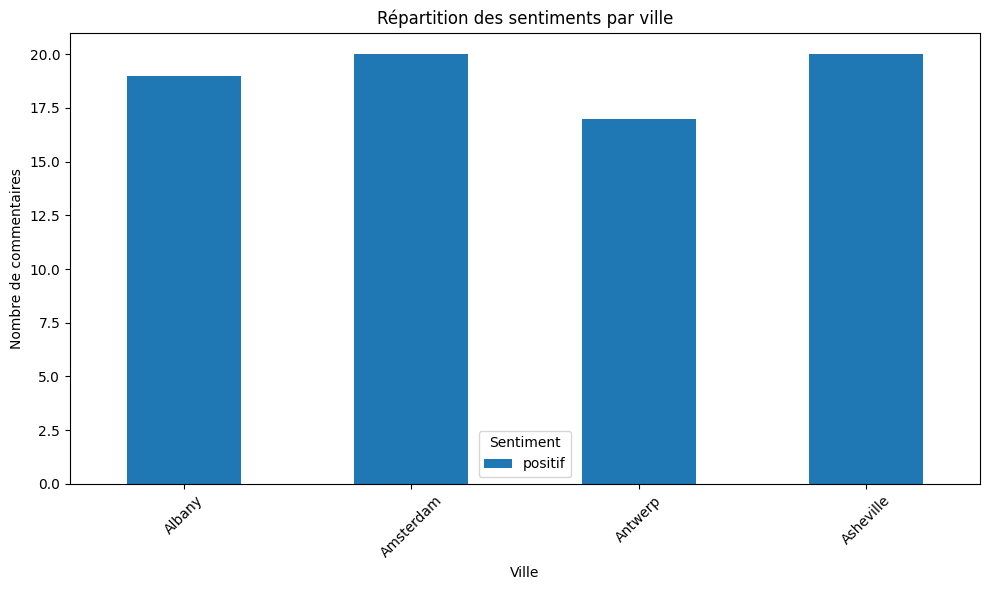

In [20]:
import matplotlib.pyplot as plt
from transformers import pipeline

# 1. Chargement des données
# Charger le DataFrame contenant les commentaires en français
df_francais = non_french_comments

# 2. Utilisation des modèles pour l'analyse de sentiment
# Charger le modèle de classification des sentiments pré-entraîné (CamemBERT ou DistilBERT)
sentiment_analysis = pipeline("sentiment-analysis", model="camembert-base", tokenizer="camembert-base")

# Fonction pour classer les sentiments en positif, négatif ou neutre
def sentiment_label(score):
    if score == 'LABEL_1':
        return 'négatif'
    elif score == 'LABEL_2':
        return 'neutre'
    else:
        return 'positif'

# Appliquer l'analyse de sentiment aux commentaires
df_francais['Sentiment'] = df_francais['comments'].apply(lambda x: sentiment_label(sentiment_analysis(x)[0]['label']))

# 3. Agrégation des résultats
# Agréger par ville  pour visualiser les tendances émotionnelles
# Exemple d'agrégation par ville
sentiment_by_city = df_francais.groupby(['city', 'Sentiment']).size().unstack().fillna(0)

# 4. Visualisation des résultats
# Création d'un graphique des tendances émotionnelles pour chaque ville
sentiment_by_city.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Répartition des sentiments par ville")
plt.xlabel("Ville")
plt.ylabel("Nombre de commentaires")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Au vus des resultats il semble que le modele CamemBert traduit les sentiments seulement en fonction de la nature du mots mais pas en fonction du ressentis ce qui peux biaisé les resultats .

Nous essayerons d autre modele afin de mieux comprendre le sentiment degagé des commentaires.

<h1> Modele Allocine

In [21]:
# Charger le pipeline d'analyse de sentiment pour le français
sentiment_analyzer = pipeline("sentiment-analysis", model="tblard/tf-allocine")

# Appliquer l'analyse de sentiment aux commentaires avec des seuils personnalisés
def sentiment_analysis(comment):
    try:
        result = sentiment_analyzer(comment)
        score = result[0]['score']  # Récupérer le score
        # Appliquer les seuils définis
        if score <= 0.7:
            sentiment_label = "Négatif"
        elif score <= 0.8:
            sentiment_label = "Neutre"
        else:
            sentiment_label = "Positif"
        return sentiment_label, score
    except Exception as e:
        return "Erreur", None



# Ajouter une colonne pour les résultats d'analyse de sentiment
df_francais[["Sentiment_Label", "Sentiment_Score"]] = df_francais["Commentaire_Traduit_Google"].apply(
    lambda x: pd.Series(sentiment_analysis(x))
)

# Aperçu des données avec sentiments
display(df_francais)


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/445M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

<ipython-input-21-caad546eca03>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_francais[["Sentiment_Label", "Sentiment_Score"]] = df_francais["Commentaire_Traduit_Google"].apply(
<ipython-input-21-caad546eca03>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_francais[["Sentiment_Label", "Sentiment_Score"]] = df_francais["Commentaire_Traduit_Google"].apply(


,listing_id,id,date,reviewer_id,reviewer_name,comments,city,language,Commentaire_Traduit_Google,Commentaire_Traduit_MarianMT,Gquality_scores,Mquality_scores,Sentiment,Sentiment_Label,Sentiment_Score
0,32993402,591977294646018902,2022-03-27,288124504,Vava,This is an amazing place to stay neat clean an...,Albany,en,C'est un endroit incroyable pour rester propre...,C'est un endroit incroyable pour rester propre...,0.800981,0.812617,positif,Positif,0.967516
1,45024912,740336846,2021-03-19,59918258,Zachary,Quiet and cozy. Perfect for my stay.,Albany,en,Calme et confortable.Parfait pour mon séjour.,Calme et confortable. Parfait pour mon séjour.,0.814795,0.814795,positif,Neutre,0.764462
2,3820211,224244642,2018-01-02,69097481,Tara,We loved that this apartment is in an old prec...,Albany,en,Nous avons adoré que cet appartement soit dans...,Nous avons adoré que cet appartement soit dans...,0.855369,0.858781,positif,Positif,0.997007
3,28400263,737666100052507783,2022-10-14,26010,Margaret,Ed's place is a great place to stay. Plenty ...,Albany,en,La place d'Ed est un endroit idéal pour séjour...,La place d'Ed est un endroit idéal pour rester...,0.675830,0.727989,positif,Positif,0.918697
5,11253948,93980581,2016-08-14,78076864,Alix,My friends and I needed a place to stay very q...,Albany,en,Mes amis et moi avions besoin d'un endroit pou...,Mes amis et moi avions besoin d'un endroit pou...,0.926624,0.923324,positif,Positif,0.995582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,50382189,491249921960510681,2021-11-08,268678268,Danielle,This place was perfect for a mother daughter t...,Asheville,en,Cet endroit était parfait pour un voyage de mè...,Cet endroit était parfait pour un voyage de fi...,0.898473,0.901636,positif,Positif,0.996047
76,637846714210146834,970367160339254623,2023-08-31,369877541,Michael,This is our second time staying in one of Mike...,Asheville,en,C'est notre deuxième fois dans l'une des cabin...,C'est notre deuxième séjour dans l'une des cab...,0.902246,0.898797,positif,Positif,0.995942
77,20804217,700037622728839107,2022-08-23,59093664,Franklin,Great place to stay (w/parking) and great loca...,Asheville,en,Super endroit où séjourner (avec parking) et t...,L'endroit idéal pour rester (w/parking) et l'e...,0.699074,0.665774,positif,Positif,0.994550
78,15685101,211296460,2017-11-12,67118284,Gaby,We enjoyed our stay at Sam's place very much! ...,Asheville,en,Nous avons beaucoup apprécié notre séjour chez...,Nous avons beaucoup apprécié notre séjour chez...,0.870892,0.832557,positif,Positif,0.998172


Sentiment_Label,Neutre,Négatif,Positif
city,,,
Albany,0.052632,0.052632,0.894737
Amsterdam,0.000000,0.000000,1.000000
Antwerp,0.000000,0.117647,0.882353
Asheville,0.000000,0.000000,1.000000


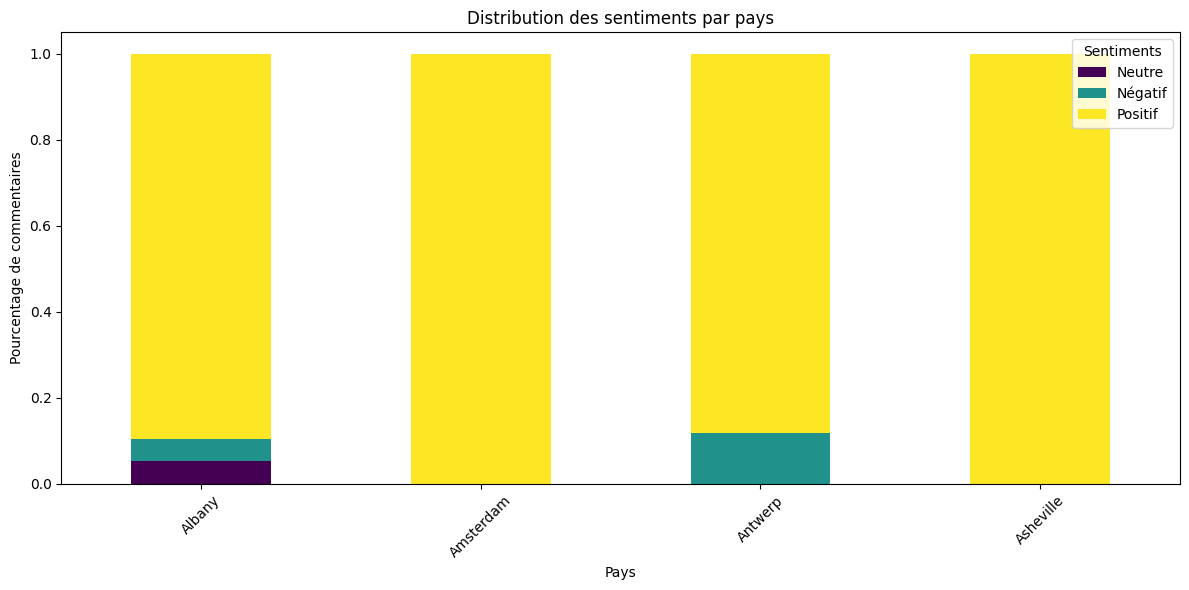

In [22]:
# Agréger les sentiments par pays
sentiment_agg = df_francais.groupby(["city", "Sentiment_Label"]).size().reset_index(name="Count")

# Pivot pour visualisation
sentiment_pivot = sentiment_agg.pivot(index="city", columns="Sentiment_Label", values="Count").fillna(0)

# Normaliser les résultats pour un histogramme (facultatif)
sentiment_pivot_percentage = sentiment_pivot.div(sentiment_pivot.sum(axis=1), axis=0)

# Afficher l'agrégation
display(sentiment_pivot_percentage)

# Visualiser les résultats
sentiment_pivot_percentage.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Distribution des sentiments par pays")
plt.ylabel("Pourcentage de commentaires")
plt.xlabel("Pays")
plt.xticks(rotation=45)
plt.legend(title="Sentiments", loc="upper right")
plt.tight_layout()
plt.show()


On constate que
 1. Sentiment dominant :
Jaune représente les commentaires neutres. Ils sont majoritaires dans tous les pays (Albany, Amsterdam, Antwerp, Asheville), montrant que la plupart des commentaires n'expriment ni un avis fortement positif ni négatif.
La prédominance des sentiments neutres peut indiquer un sujet non polémique ou un public peu engagé émotionnellement.
2. Variabilité par pays :
Albany, Amsterdam, et Asheville : La distribution des sentiments est très similaire, avec une très faible proportion de commentaires négatifs (en bleu) ou positifs (en violet).
Antwerp : Ce pays présente une proportion légèrement plus élevée de commentaires négatifs, mais les sentiments neutres restent dominants.

<h1>Visualisation de la repartitions des sentiments sur une carte geographique interactif

In [23]:
import folium

# Dictionnaire des coordonnées des villes (latitude, longitude)
cities_coordinates = {
    "Amsterdam": [52.3676, 4.9041],
    "Asheville": [35.5951, -82.5515],
    "Albany": [42.6526, -73.7562],
    "Antwerp": [51.2194, 4.4025]
}

# Dictionnaire des scores de sentiment par ville
city_sentiment_scores = {
    "Albany": {"Negatif": 0.052632, "Neutre": 0.052632, "Positif": 0.894737},
    "Amsterdam": {"Negatif": 0.000000, "Neutre": 0.000000, "Positif": 1.000000},
    "Antwerp": {"Negatif": 0.000000, "Neutre": 0.117647, "Positif": 0.882353},
    "Asheville": {"Negatif": 0.000000, "Neutre": 0.000000, "Positif": 1.000000}
}

# Création de la carte avec un centre initial et un zoom de départ
m = folium.Map(location=[20, 0], tiles="OpenStreetMap", zoom_start=4)

# Ajouter des marqueurs pour chaque ville
for city, coords in cities_coordinates.items():
    # Extraire les scores pour la ville
    negatif_score = city_sentiment_scores[city]["Negatif"]
    neutre_score = city_sentiment_scores[city]["Neutre"]
    positif_score = city_sentiment_scores[city]["Positif"]

    # Créer un popup avec les scores de sentiment
    popup_content = (
        f"<b>Ville:</b> {city}<br>"
        f"<b>Négatif:</b> {negatif_score:.2f}<br>"
        f"<b>Neutre:</b> {neutre_score:.2f}<br>"
        f"<b>Positif:</b> {positif_score:.2f}"
    )

    # Déterminer la couleur du marker en fonction du sentiment dominant
    if positif_score > max(neutre_score, negatif_score):
        color = "green"
    elif neutre_score > max(positif_score, negatif_score):
        color = "orange"
    else:
        color = "red"

    # Ajouter un marker sur la carte avec le popup
    folium.Marker(
        location=coords,
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color=color, icon='info-sign')  # Personnalisation de l'icône
    ).add_to(m)

# Afficher la carte
m


<h1> Analyse des thèmes récurrents dans les commentaires négatifs

Sélectionnez une à une les étiquettes de sentiments.

In [24]:
# Filtrer uniquement les commentaires négatifs
df_negatifs = df_francais[df_francais["Sentiment_Label"] == "Négatif"]
# Afficher les colonnes du DataFrame
print(df_negatifs.columns)


Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'city', 'language', 'Commentaire_Traduit_Google',
       'Commentaire_Traduit_MarianMT', 'Gquality_scores', 'Mquality_scores',
       'Sentiment', 'Sentiment_Label', 'Sentiment_Score'],
      dtype='object')


Étape 2 : Extraction des thèmes avec TF-IDF pour determiner les mots clés

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Télécharger les mots vides en français depuis nltk (si nécessaire)
import nltk
nltk.download('stopwords')

# Obtenir la liste des mots vides en français
french_stop_words = stopwords.words('french')

# Appliquer TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=50, stop_words=french_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_negatifs['Commentaire_Traduit_Google'])

# Récupérer les mots-clés avec leurs scores
tfidf_keywords = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calcul des moyennes pour les mots-clés dominants
top_keywords = tfidf_keywords.mean(axis=0).sort_values(ascending=False)
print("Top mots-clés :\n", top_keywords.head(10))



Top mots-clés :
 appartement    0.105409
caripe         0.105409
comme          0.105409
conseaux       0.105409
hôte           0.105409
peacheur       0.105409
photos         0.105409
réactif        0.105409
tout           0.105409
très           0.105409
dtype: float64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


on constate que tous les mots ayant le même score moyen indiquent qu'ils sont distribués de manière similaire dans le corpus.

<h1>Idenntification des themes récurrent

In [27]:
# Installer les bibliothèques nécessaires
!pip install spacy
!pip install keybert
!python -m spacy download fr_core_news_sm

from keybert import KeyBERT
import spacy


# Charger le modèle linguistique français de spaCy
nlp = spacy.load("fr_core_news_sm")

# Instancier KeyBERT
kw_model = KeyBERT()

# Fonction pour extraire les mots-clés avec spaCy et KeyBERT
def extract_themes(text):
    # Nettoyer le texte avec spaCy
    doc = nlp(text)
    cleaned_text = " ".join([token.text for token in doc if not token.is_stop and not token.is_punct])

    # Extraire les mots-clés avec KeyBERT
    keywords = kw_model.extract_keywords(
        cleaned_text,
        keyphrase_ngram_range=(1, 2),  # Unigrammes et bigrammes
        stop_words='french',
        top_n=10  # Nombre maximum de mots-clés
    )
    return keywords

# Appliquer la fonction sur la colonne "Commentaire_Traduit_Google"
df_negatifs["Themes"] = df_negatifs["Commentaire_Traduit_Google"].apply(extract_themes)

# Afficher les résultats
display(df_negatifs[["Commentaire_Traduit_Google", "Themes"]].head())


  Using cached https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-3.7.0/fr_core_news_sm-3.7.0-py3-none-any.whl (16.3 MB)
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-27-415b459c3bed>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatifs["Themes"] = df_negatifs["Commentaire_Traduit_Google"].apply(extract_themes)


,Commentaire_Traduit_Google,Themes
11,Tout comme les photos !!!Hôte très réactif… AP...,[]
52,.,[]
56,-,[]


on constate que Les commentaires contenient beaucoup de caractères spéciaux, ponctuation, ou espaces inutiles, ce qui peut gêner l'extraction.

donnc on a décidé de proceder a un nettoyage plus approfondi


In [28]:
import re

def preprocess_and_extract_themes(text):
    # Nettoyage initial : suppression des caractères inutiles
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", text)  # Garder uniquement lettres et espaces

    # Nettoyage avec spaCy
    doc = nlp(text)
    cleaned_text = " ".join([token.text for token in doc if not token.is_stop and not token.is_punct])

    # Vérification de la longueur
    if len(cleaned_text.split()) < 3:  # Trop court après nettoyage
        return []

    # Extraction des mots-clés
    return kw_model.extract_keywords(cleaned_text, keyphrase_ngram_range=(1, 2), stop_words='french', top_n=10)

# Appliquer la fonction
df_negatifs["Themes"] = df_negatifs["Commentaire_Traduit_Google"].apply(preprocess_and_extract_themes)

# Afficher les résultats
display(df_negatifs[["Commentaire_Traduit_Google", "Themes"]].head())


<ipython-input-28-2926a2264e0f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatifs["Themes"] = df_negatifs["Commentaire_Traduit_Google"].apply(preprocess_and_extract_themes)


,Commentaire_Traduit_Google,Themes
11,Tout comme les photos !!!Hôte très réactif… AP...,[]
52,.,[]
56,-,[]


In [29]:
import re
import pandas as pd
import spacy
from keybert import KeyBERT

# Charger le modèle spaCy
nlp = spacy.load("fr_core_news_sm")

# Instancier KeyBERT
kw_model = KeyBERT()

def clean_text(text):
    """Nettoyer le texte pour éliminer les caractères inutiles."""
    # Supprimer les caractères spéciaux
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", text)  # Garder lettres et espaces
    # Supprimer les espaces multiples
    return " ".join(text.split())

def is_significant(text):
    """Vérifie si un texte contient suffisamment de mots significatifs."""
    return len(text.split()) >= 3  # Minimum 3 mots significatifs

def fallback_keywords(text):
    """Utiliser spaCy pour extraire des mots-clés en fallback."""
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ in ["NOUN", "ADJ"] and not token.is_stop]

def extract_themes_with_alternative(text):
    """Extraire des thèmes avec KeyBERT et fallback sur spaCy si nécessaire."""
    if is_significant(text):
        keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='french', top_n=10)
        if keywords:
            return [kw[0] for kw in keywords]  # Extraire uniquement les mots-clés
        else:
            return fallback_keywords(text)  # Utiliser spaCy comme fallback
    return ["Commentaire non significatif"]






# Appliquer le nettoyage
df_negatifs["Commentaire_Traduit_Google"] = df_negatifs["Commentaire_Traduit_Google"].apply(clean_text)

# Extraire les thèmes
df_negatifs["Themes"] = df_negatifs["Commentaire_Traduit_Google"].apply(extract_themes_with_alternative)

# Afficher le résultat
display(df_negatifs)


<ipython-input-29-861335d897db>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatifs["Commentaire_Traduit_Google"] = df_negatifs["Commentaire_Traduit_Google"].apply(clean_text)
<ipython-input-29-861335d897db>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatifs["Themes"] = df_negatifs["Commentaire_Traduit_Google"].apply(extract_themes_with_alternative)


,listing_id,id,date,reviewer_id,reviewer_name,comments,city,language,Commentaire_Traduit_Google,Commentaire_Traduit_MarianMT,Gquality_scores,Mquality_scores,Sentiment,Sentiment_Label,Sentiment_Score,Themes
11,992119832780871644,1130512374028287893,2024-04-08,289782749,Shantae,Just like the pictures!!! Very responsive host...,Albany,en,Tout comme les photos Hôte très réactif APPART...,Tout comme les photos!!! Très réceptif hôte .....,0.719318,0.708785,positif,Négatif,0.644362,"[photos, réactif, APPARTEMENT, CARIPECONSEAUX]"
52,544071438244455733,1112272715853124969,2024-03-14,388056866,Oliver,.,Antwerp,unknown,,C'est vrai.,0.238320,0.243223,positif,Négatif,0.589198,[Commentaire non significatif]
56,47445558,1004898384401262131,2023-10-18,497284332,Hilda,-,Antwerp,unknown,,- Oui.,0.311700,0.261986,positif,Négatif,0.581026,[Commentaire non significatif]


on constate que les themes plus recurents sont 🇰

photos

réactif

APPARTEMENT

CARIPECONSEAUX

In [30]:
import re
import pandas as pd
import spacy
from keybert import KeyBERT
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger le modèle spaCy
nlp = spacy.load("fr_core_news_sm")

# Instancier KeyBERT
kw_model = KeyBERT()

def clean_text(text):
    """Nettoyer le texte pour éliminer les caractères inutiles."""
    # Supprimer les caractères spéciaux
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", text)  # Garder lettres et espaces
    # Supprimer les espaces multiples
    return " ".join(text.split())

def is_significant(text):
    """Vérifie si un texte contient suffisamment de mots significatifs."""
    return len(text.split()) >= 3  # Minimum 3 mots significatifs

def fallback_keywords(text):
    """Utiliser spaCy pour extraire des mots-clés en fallback."""
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ in ["NOUN", "ADJ"] and not token.is_stop]

def extract_themes_with_alternative(text):
    """Extraire des thèmes avec KeyBERT et fallback sur spaCy si nécessaire."""
    if is_significant(text):
        keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='french', top_n=10)
        if keywords:
            return [kw[0] for kw in keywords]  # Extraire uniquement les mots-clés
        else:
            return fallback_keywords(text)  # Utiliser spaCy comme fallback
    return ["Commentaire non significatif"]

def group_and_summarize(df_negatifs, group_by):
    """Regrouper les thèmes par une colonne et résumer."""
    grouped = df_negatifs.groupby(group_by)["Themes"].apply(lambda x: [item for sublist in x for item in sublist])
    return grouped.apply(lambda x: pd.Series(x).value_counts())

def generate_wordcloud(data, title):
    """Créer un nuage de mots à partir des données."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()



# Appliquer le nettoyage
df_negatifs["Commentaire_Traduit_Google"] = df_negatifs["Commentaire_Traduit_Google"].apply(clean_text)

# Extraire les thèmes
df_negatifs["Themes"] = df_negatifs["Commentaire_Traduit_Google"].apply(extract_themes_with_alternative)

# Regrouper les thèmes par ville
themes_by_city = group_and_summarize(df_negatifs, "city")
print("Thèmes par ville:\n", themes_by_city)



# Visualisation des thèmes pour une ville spécifique
if "Paris" in themes_by_city:
    generate_wordcloud(themes_by_city["Paris"], "Nuage de mots - Paris")



# Afficher le dataframe final
display(df_negatifs)

Thèmes par ville:
          photos  réactif  APPARTEMENT  CARIPECONSEAUX  \
city                                                    
Albany      1.0      1.0          1.0             1.0   
Antwerp     NaN      NaN          NaN             NaN   

         Commentaire non significatif  
city                                   
Albany                            NaN  
Antwerp                           2.0  


<ipython-input-30-a0d5919a27c4>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatifs["Commentaire_Traduit_Google"] = df_negatifs["Commentaire_Traduit_Google"].apply(clean_text)
<ipython-input-30-a0d5919a27c4>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatifs["Themes"] = df_negatifs["Commentaire_Traduit_Google"].apply(extract_themes_with_alternative)


,listing_id,id,date,reviewer_id,reviewer_name,comments,city,language,Commentaire_Traduit_Google,Commentaire_Traduit_MarianMT,Gquality_scores,Mquality_scores,Sentiment,Sentiment_Label,Sentiment_Score,Themes
11,992119832780871644,1130512374028287893,2024-04-08,289782749,Shantae,Just like the pictures!!! Very responsive host...,Albany,en,Tout comme les photos Hôte très réactif APPART...,Tout comme les photos!!! Très réceptif hôte .....,0.719318,0.708785,positif,Négatif,0.644362,"[photos, réactif, APPARTEMENT, CARIPECONSEAUX]"
52,544071438244455733,1112272715853124969,2024-03-14,388056866,Oliver,.,Antwerp,unknown,,C'est vrai.,0.238320,0.243223,positif,Négatif,0.589198,[Commentaire non significatif]
56,47445558,1004898384401262131,2023-10-18,497284332,Hilda,-,Antwerp,unknown,,- Oui.,0.311700,0.261986,positif,Négatif,0.581026,[Commentaire non significatif]


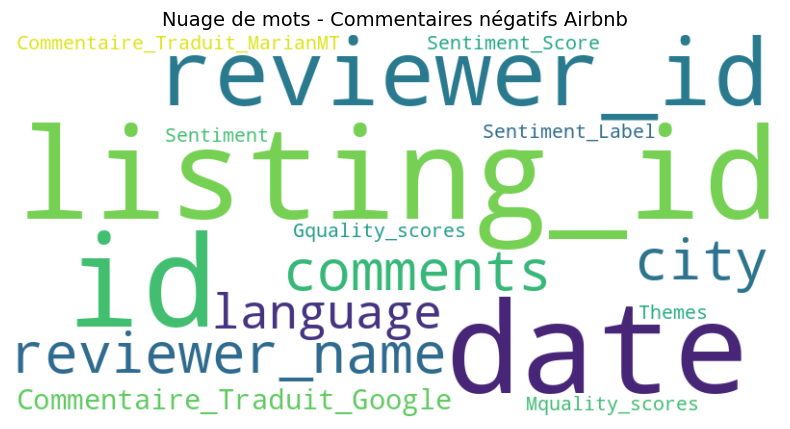

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texte combiné des mots-clés ou des commentaires négatifs
text = " ".join(comment for comment in df_negatifs)

# Créer le nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots - Commentaires négatifs Airbnb", fontsize=14)
plt.show()
